<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Cuffless-Blood-Pressure-Monitoring-using-PAT/blob/main/BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
df_final = pd.read_csv("/content/processed_data.csv")

In [63]:
print(f"Number of elements in the array in the first column: {len(df_final['PAT (s)'][0])}")

Number of elements in the array in the first column: 5095


In [64]:
df_final.head()

,PAT (s),Systolic BP,Diastolic BP
0,"[np.float64(0.712), np.float64(0.704), np.floa...",144.729100,72.720148
1,"[np.float64(0.648), np.float64(0.008), np.floa...",109.433043,52.947696
2,"[np.float64(0.648), np.float64(0.664), np.floa...",173.209862,73.697431
3,"[np.float64(0.72), np.float64(0.72), np.float6...",135.038979,61.380101
4,"[np.float64(0.032), np.float64(0.024), np.floa...",134.996052,64.722653


In [65]:
print(df_final['PAT (s)'][0])

[np.float64(0.712), np.float64(0.704), np.float64(0.704), np.float64(0.712), np.float64(0.696), np.float64(0.712), np.float64(0.704), np.float64(0.704), np.float64(0.696), np.float64(0.704), np.float64(0.688), np.float64(0.712), np.float64(0.712), np.float64(0.72), np.float64(0.712), np.float64(0.712), np.float64(0.72), np.float64(0.72), np.float64(0.72), np.float64(0.72), np.float64(0.72), np.float64(0.712), np.float64(0.72), np.float64(0.712), np.float64(0.728), np.float64(0.728), np.float64(0.72), np.float64(0.72), np.float64(0.72), np.float64(0.712), np.float64(0.712), np.float64(0.712), np.float64(0.712), np.float64(0.704), np.float64(0.712), np.float64(0.72), np.float64(0.728), np.float64(0.728), np.float64(0.72), np.float64(0.704), np.float64(0.712), np.float64(0.712), np.float64(0.72), np.float64(0.72), np.float64(0.72), np.float64(0.728), np.float64(0.72), np.float64(0.72), np.float64(0.728), np.float64(0.72), np.float64(0.728), np.float64(0.72), np.float64(0.72), np.float64(0

In [66]:
print(type(df_final['PAT (s)'][0]))

<class 'str'>


In [67]:
data_list = eval(df_final['PAT (s)'][0])

In [68]:
float_list = [float(x) for x in  data_list]
print(float_list)

[0.712, 0.704, 0.704, 0.712, 0.696, 0.712, 0.704, 0.704, 0.696, 0.704, 0.688, 0.712, 0.712, 0.72, 0.712, 0.712, 0.72, 0.72, 0.72, 0.72, 0.72, 0.712, 0.72, 0.712, 0.728, 0.728, 0.72, 0.72, 0.72, 0.712, 0.712, 0.712, 0.712, 0.704, 0.712, 0.72, 0.728, 0.728, 0.72, 0.704, 0.712, 0.712, 0.72, 0.72, 0.72, 0.728, 0.72, 0.72, 0.728, 0.72, 0.728, 0.72, 0.72, 0.72, 0.728, 0.728, 0.736, 0.456, 0.576, 0.688, 0.696, 0.688, 0.68, 0.688, 0.672, 0.672, 0.688, 0.68, 0.624, 0.664, 0.656, 0.656, 0.656, 0.64, 0.656, 0.648, 0.672, 1.496, 0.816, 0.72, 0.728, 0.72, 0.712, 0.72, 0.728, 0.72, 0.72, 0.712, 0.72, 0.712, 0.72, 0.736, 0.728, 0.712, 0.72, 0.712, 0.712, 0.712, 0.592, 0.632, 0.712, 0.704, 0.704, 0.712, 0.712, 0.712, 0.696, 0.72, 0.736, 0.712, 0.728, 0.72, 0.712, 0.728, 0.712, 0.712, 0.728, 0.72, 0.68, 0.024, 0.672, 0.688, 0.696, 0.696, 0.696, 0.696, 0.712, 0.704, 0.704, 0.704, 0.704, 0.704, 0.696, 0.688, 0.696, 0.704, 0.704, 0.704, 0.704, 0.704, 0.696, 0.704, 0.696, 0.704, 0.704, 0.704, 0.696, 0.704,

In [69]:
print(len(float_list))

271


In [70]:
print(df_final.isnull().sum())

PAT (s)         0
Systolic BP     0
Diastolic BP    0
dtype: int64


In [71]:
print(len(df_final))

500


In [72]:
import re
import numpy as np


pat_cleaned_no_64_new =[]
for i in range(len(df_final)):
    data_list=eval(df_final['PAT (s)'][i])
    float_list = [float(x) for x in  data_list]
    pat_cleaned_no_64_new.append(float_list)




In [73]:
print(pat_cleaned_no_64_new)

[[0.712, 0.704, 0.704, 0.712, 0.696, 0.712, 0.704, 0.704, 0.696, 0.704, 0.688, 0.712, 0.712, 0.72, 0.712, 0.712, 0.72, 0.72, 0.72, 0.72, 0.72, 0.712, 0.72, 0.712, 0.728, 0.728, 0.72, 0.72, 0.72, 0.712, 0.712, 0.712, 0.712, 0.704, 0.712, 0.72, 0.728, 0.728, 0.72, 0.704, 0.712, 0.712, 0.72, 0.72, 0.72, 0.728, 0.72, 0.72, 0.728, 0.72, 0.728, 0.72, 0.72, 0.72, 0.728, 0.728, 0.736, 0.456, 0.576, 0.688, 0.696, 0.688, 0.68, 0.688, 0.672, 0.672, 0.688, 0.68, 0.624, 0.664, 0.656, 0.656, 0.656, 0.64, 0.656, 0.648, 0.672, 1.496, 0.816, 0.72, 0.728, 0.72, 0.712, 0.72, 0.728, 0.72, 0.72, 0.712, 0.72, 0.712, 0.72, 0.736, 0.728, 0.712, 0.72, 0.712, 0.712, 0.712, 0.592, 0.632, 0.712, 0.704, 0.704, 0.712, 0.712, 0.712, 0.696, 0.72, 0.736, 0.712, 0.728, 0.72, 0.712, 0.728, 0.712, 0.712, 0.728, 0.72, 0.68, 0.024, 0.672, 0.688, 0.696, 0.696, 0.696, 0.696, 0.712, 0.704, 0.704, 0.704, 0.704, 0.704, 0.696, 0.688, 0.696, 0.704, 0.704, 0.704, 0.704, 0.704, 0.696, 0.704, 0.696, 0.704, 0.704, 0.704, 0.696, 0.704

In [74]:
print(len(pat_cleaned_no_64_new))

500


In [75]:


# Step 1: Get lengths of each sublist
lengths = [len(sublist) for sublist in pat_cleaned_no_64_new]

# Step 2: Check if all lengths are the same
all_same = len(set(lengths)) == 1  # True if only one unique length

if all_same:
    unique_length = lengths[0]
    count = len(pat_cleaned_no_64_new)
    print(f"All sublists have the same length: {unique_length}")
    print(f"Count of sublists: {count}")
else:
    from collections import Counter
    length_counts = Counter(lengths)

    print("Sublists have varying lengths:")
    for length, count in length_counts.items():
        print(f"Length {length}: {count} sublists")

    # Find minimum length and its count
    min_length = min(length_counts.keys())
    min_length_count = length_counts[min_length]
    print(f"\nMinimum length of sublists: {min_length}")
    print(f"Number of sublists with minimum length: {min_length_count}")


Sublists have varying lengths:
Length 271: 1 sublists
Length 23: 4 sublists
Length 109: 1 sublists
Length 567: 1 sublists
Length 694: 1 sublists
Length 558: 1 sublists
Length 432: 1 sublists
Length 994: 2 sublists
Length 485: 1 sublists
Length 74: 5 sublists
Length 214: 1 sublists
Length 618: 2 sublists
Length 10: 4 sublists
Length 583: 1 sublists
Length 469: 1 sublists
Length 13: 2 sublists
Length 539: 3 sublists
Length 418: 1 sublists
Length 91: 1 sublists
Length 38: 2 sublists
Length 149: 1 sublists
Length 504: 1 sublists
Length 716: 1 sublists
Length 28: 1 sublists
Length 457: 2 sublists
Length 533: 2 sublists
Length 8: 4 sublists
Length 620: 3 sublists
Length 63: 1 sublists
Length 146: 1 sublists
Length 710: 2 sublists
Length 725: 1 sublists
Length 410: 1 sublists
Length 283: 1 sublists
Length 119: 1 sublists
Length 621: 1 sublists
Length 522: 1 sublists
Length 180: 1 sublists
Length 687: 1 sublists
Length 207: 3 sublists
Length 695: 2 sublists
Length 407: 1 sublists
Length 100: 2

In [76]:
import pandas as pd

pat_df = pd.DataFrame(pat_cleaned_no_64_new)

# Display the head of the new DataFrame
display(pat_df.head())

# Print the shape of the DataFrame to see the number of rows and columns
print(f"Shape of the new DataFrame: {pat_df.shape}")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112
0,0.712,0.704,0.704,0.712,0.696,0.712,0.704,0.704,0.696,0.704,0.688,0.712,0.712,0.720,0.712,0.712,0.720,0.720,0.720,0.720,0.720,0.712,0.720,0.712,0.728,0.728,0.720,0.720,0.720,0.712,0.712,0.712,0.712,0.704,0.712,0.720,0.728,0.728,0.720,0.704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.648,0.008,0.640,0.640,0.648,0.008,0.648,0.008,0.008,0.640,0.648,0.648,0.656,0.008,0.008,0.648,0.648,0.640,0.648,0.648,0.648,0.640,0.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.648,0.664,0.648,0.656,0.640,0.632,0.616,0.640,0.672,0.848,0.760,0.648,0.672,0.664,0.648,0.664,0.664,0.664,0.672,0.200,0.432,0.632,0.640,0.632,0.640,0.632,0.640,0.640,0.632,0.616,0.688,0.688,0.672,0.656,0.656,0.640,0.648,0.648,0.656,0.648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.720,0.720,0.728,0.720,0.720,0.728,0.720,0.720,0.728,0.728,0.728,0.752,0.712,0.728,0.728,0.720,0.728,0.536,0.472,0.760,0.704,0.696,0.696,0.704,0.688,0.704,0.704,0.704,0.688,0.704,0.704,0.696,0.696,0.704,0.696,0.704,0.696,0.696,0.704,0.704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.032,0.024,0.032,0.080,0.032,0.024,0.032,0.008,0.696,0.184,0.152,0.056,0.040,0.512,0.024,0.040,0.024,0.032,0.008,0.008,0.016,0.032,0.016,0.624,0.016,0.008,0.008,0.016,0.008,0.008,0.616,0.640,0.024,0.592,0.616,0.624,0.616,0.616,0.624,0.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of the new DataFrame: (500, 1113)


In [77]:
import numpy as np
import pandas as pd



def fill_nan_with_row_median(row):
    median = row.median()
    return row.fillna(median)

pat_df_filled = pat_df.apply(fill_nan_with_row_median, axis=1)

# Display to verify
display(pat_df_filled.head())
print(f"Shape after filling NaNs: {pat_df_filled.shape}")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112
0,0.712,0.704,0.704,0.712,0.696,0.712,0.704,0.704,0.696,0.704,0.688,0.712,0.712,0.720,0.712,0.712,0.720,0.720,0.720,0.720,0.720,0.712,0.720,0.712,0.728,0.728,0.720,0.720,0.720,0.712,0.712,0.712,0.712,0.704,0.712,0.720,0.728,0.728,0.720,0.704,...,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712
1,0.648,0.008,0.640,0.640,0.648,0.008,0.648,0.008,0.008,0.640,0.648,0.648,0.656,0.008,0.008,0.648,0.648,0.640,0.648,0.648,0.648,0.640,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,...,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648
2,0.648,0.664,0.648,0.656,0.640,0.632,0.616,0.640,0.672,0.848,0.760,0.648,0.672,0.664,0.648,0.664,0.664,0.664,0.672,0.200,0.432,0.632,0.640,0.632,0.640,0.632,0.640,0.640,0.632,0.616,0.688,0.688,0.672,0.656,0.656,0.640,0.648,0.648,0.656,0.648,...,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656
3,0.720,0.720,0.728,0.720,0.720,0.728,0.720,0.720,0.728,0.728,0.728,0.752,0.712,0.728,0.728,0.720,0.728,0.536,0.472,0.760,0.704,0.696,0.696,0.704,0.688,0.704,0.704,0.704,0.688,0.704,0.704,0.696,0.696,0.704,0.696,0.704,0.696,0.696,0.704,0.704,...,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704
4,0.032,0.024,0.032,0.080,0.032,0.024,0.032,0.008,0.696,0.184,0.152,0.056,0.040,0.512,0.024,0.040,0.024,0.032,0.008,0.008,0.016,0.032,0.016,0.624,0.016,0.008,0.008,0.016,0.008,0.008,0.616,0.640,0.024,0.592,0.616,0.624,0.616,0.616,0.624,0.624,...,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640


Shape after filling NaNs: (500, 1113)


In [78]:
merged_df = pd.concat([pat_df_filled, df_final[['Systolic BP', 'Diastolic BP']]], axis=1)

print(merged_df.shape)
merged_df.head()


(500, 1115)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
0,0.712,0.704,0.704,0.712,0.696,0.712,0.704,0.704,0.696,0.704,0.688,0.712,0.712,0.720,0.712,0.712,0.720,0.720,0.720,0.720,0.720,0.712,0.720,0.712,0.728,0.728,0.720,0.720,0.720,0.712,0.712,0.712,0.712,0.704,0.712,0.720,0.728,0.728,0.720,0.704,...,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,0.712,144.729100,72.720148
1,0.648,0.008,0.640,0.640,0.648,0.008,0.648,0.008,0.008,0.640,0.648,0.648,0.656,0.008,0.008,0.648,0.648,0.640,0.648,0.648,0.648,0.640,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,...,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,109.433043,52.947696
2,0.648,0.664,0.648,0.656,0.640,0.632,0.616,0.640,0.672,0.848,0.760,0.648,0.672,0.664,0.648,0.664,0.664,0.664,0.672,0.200,0.432,0.632,0.640,0.632,0.640,0.632,0.640,0.640,0.632,0.616,0.688,0.688,0.672,0.656,0.656,0.640,0.648,0.648,0.656,0.648,...,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,0.656,173.209862,73.697431
3,0.720,0.720,0.728,0.720,0.720,0.728,0.720,0.720,0.728,0.728,0.728,0.752,0.712,0.728,0.728,0.720,0.728,0.536,0.472,0.760,0.704,0.696,0.696,0.704,0.688,0.704,0.704,0.704,0.688,0.704,0.704,0.696,0.696,0.704,0.696,0.704,0.696,0.696,0.704,0.704,...,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,0.704,135.038979,61.380101
4,0.032,0.024,0.032,0.080,0.032,0.024,0.032,0.008,0.696,0.184,0.152,0.056,0.040,0.512,0.024,0.040,0.024,0.032,0.008,0.008,0.016,0.032,0.016,0.624,0.016,0.008,0.008,0.016,0.008,0.008,0.616,0.640,0.024,0.592,0.616,0.624,0.616,0.616,0.624,0.624,...,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,0.640,134.996052,64.722653


In [79]:
merged_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.549648,0.559776,0.558112,0.555568,0.560496,0.559456,0.550144,0.550352,0.535848,0.546456,0.547816,0.550648,0.543848,0.545016,0.547232,0.559392,0.54344,0.539488,0.544328,0.548760,0.560296,0.553672,0.545336,0.552856,0.551800,0.546744,0.546544,0.542144,0.534752,0.553072,0.546064,0.552368,0.557216,0.553440,0.546848,0.548576,0.552768,0.554016,0.557408,0.549792,...,0.563792,0.563792,0.563792,0.563760,0.563632,0.563776,0.563920,0.563968,0.563888,0.563808,0.563808,0.563792,0.563792,0.563808,0.563824,0.563808,0.563824,0.563824,0.563856,0.563856,0.563792,0.563808,0.563824,0.563824,0.563808,0.563824,0.563824,0.563808,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563840,135.671132,66.461246
std,0.257180,0.253222,0.253048,0.253391,0.252148,0.253104,0.257918,0.263260,0.268509,0.262220,0.257621,0.258576,0.263047,0.260919,0.259817,0.251245,0.26302,0.263061,0.265783,0.254642,0.250343,0.259668,0.261491,0.254688,0.258788,0.264668,0.269729,0.259956,0.265579,0.259557,0.260764,0.260420,0.253788,0.255047,0.261143,0.261402,0.261670,0.257451,0.264141,0.263276,...,0.251354,0.251379,0.251381,0.251417,0.251398,0.251267,0.251142,0.251061,0.251197,0.251323,0.251324,0.251381,0.251381,0.251349,0.251316,0.251324,0.251294,0.251316,0.251254,0.251281,0.251354,0.251322,0.251291,0.251291,0.251322,0.251291,0.251291,0.251322,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251262,22.680588,11.491304
min,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.00800,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,...,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,74.409100,51.071509
25%,0.550000,0.608000,0.592000,0.598000,0.606000,0.600000,0.584000,0.576000,0.440000,0.464000,0.528000,0.584000,0.584000,0.520000,0.576000,0.592000,0.54200,0.488000,0.494000,0.558000,0.590000,0.568000,0.520000,0.574000,0.574000,0.510000,0.488000,0.502000,0.496000,0.576000,0.566000,0.576000,0.592000,0.566000,0.536000,0.590000,0.576000,0.592000,0.584000,0.582000,...,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,

In [80]:
merged_df.iloc[0, :]

,0
0,0.712000
1,0.704000
2,0.704000
3,0.712000
4,0.696000
...,...
1110,0.712000
1111,0.712000
1112,0.712000
Systolic BP,144.729100


In [81]:
import pandas as pd
import numpy as np


def remove_outliers_iqr_columnwise(df):
    df_cleaned = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Replace outliers with NaN
        df_cleaned[col] = df[col].where((df[col] >= lower) & (df[col] <= upper), np.nan)
    return df_cleaned

cleaned_df = remove_outliers_iqr_columnwise(merged_df)


In [82]:
merged_df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
1110,0
1111,0
1112,0
Systolic BP,0


In [83]:
merged_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.549648,0.559776,0.558112,0.555568,0.560496,0.559456,0.550144,0.550352,0.535848,0.546456,0.547816,0.550648,0.543848,0.545016,0.547232,0.559392,0.54344,0.539488,0.544328,0.548760,0.560296,0.553672,0.545336,0.552856,0.551800,0.546744,0.546544,0.542144,0.534752,0.553072,0.546064,0.552368,0.557216,0.553440,0.546848,0.548576,0.552768,0.554016,0.557408,0.549792,...,0.563792,0.563792,0.563792,0.563760,0.563632,0.563776,0.563920,0.563968,0.563888,0.563808,0.563808,0.563792,0.563792,0.563808,0.563824,0.563808,0.563824,0.563824,0.563856,0.563856,0.563792,0.563808,0.563824,0.563824,0.563808,0.563824,0.563824,0.563808,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563824,0.563840,135.671132,66.461246
std,0.257180,0.253222,0.253048,0.253391,0.252148,0.253104,0.257918,0.263260,0.268509,0.262220,0.257621,0.258576,0.263047,0.260919,0.259817,0.251245,0.26302,0.263061,0.265783,0.254642,0.250343,0.259668,0.261491,0.254688,0.258788,0.264668,0.269729,0.259956,0.265579,0.259557,0.260764,0.260420,0.253788,0.255047,0.261143,0.261402,0.261670,0.257451,0.264141,0.263276,...,0.251354,0.251379,0.251381,0.251417,0.251398,0.251267,0.251142,0.251061,0.251197,0.251323,0.251324,0.251381,0.251381,0.251349,0.251316,0.251324,0.251294,0.251316,0.251254,0.251281,0.251354,0.251322,0.251291,0.251291,0.251322,0.251291,0.251291,0.251322,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251291,0.251262,22.680588,11.491304
min,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.00800,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,...,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,74.409100,51.071509
25%,0.550000,0.608000,0.592000,0.598000,0.606000,0.600000,0.584000,0.576000,0.440000,0.464000,0.528000,0.584000,0.584000,0.520000,0.576000,0.592000,0.54200,0.488000,0.494000,0.558000,0.590000,0.568000,0.520000,0.574000,0.574000,0.510000,0.488000,0.502000,0.496000,0.576000,0.566000,0.576000,0.592000,0.566000,0.536000,0.590000,0.576000,0.592000,0.584000,0.582000,...,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,0.608000,

In [84]:
cleaned_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
count,396.000000,396.000000,398.000000,398.000000,400.000000,399.000000,389.000000,388.000000,464.000000,421.000000,393.000000,393.000000,387.000000,394.000000,392.000000,399.000000,388.000000,394.000000,395.000000,396.000000,400.00000,393.000000,391.000000,398.000000,395.000000,394.000000,395.000000,398.000000,392.000000,394.000000,392.000000,395.000000,396.000000,398.000000,395.000000,392.000000,391.000000,394.000000,392.000000,388.000000,...,401.000000,401.000000,401.000000,401.000000,400.000000,400.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,500.000000,484.000000
mean,0.673838,0.685899,0.681347,0.680281,0.681660,0.683208,0.680761,0.678887,0.576147,0.635525,0.675735,0.681740,0.682284,0.675218,0.679949,0.681694,0.678856,0.669107,0.663028,0.675010,0.67894,0.677985,0.679304,0.677608,0.679514,0.675046,0.671929,0.666663,0.667765,0.679056,0.678602,0.681023,0.681444,0.676312,0.674400,0.682031,0.684000,0.681817,0.681949,0.681969,...,0.686115,0.686135,0.686135,0.686115,0.686650,0.686650,0.686135,0.686135,0.686135,0.686115,0.686115,0.686135,0.686135,0.686135,0.686135,0.686115,0.686115,0.686135,0.686135,0.686155,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,135.671132,65.168416
std,0.078884,0.050923,0.054226,0.056753,0.055283,0.054822,0.055550,0.060305,0.234722,0.159633,0.069604,0.059699,0.056671,0.074732,0.060074,0.059472,0.063412,0.089276,0.102660,0.065583,0.06303,0.062227,0.064692,0.067061,0.064385,0.075458,0.097278,0.091122,0.086196,0.064986,0.065056,0.063231,0.060126,0.068731,0.069965,0.058396,0.061118,0.061652,0.059608,0.060884,...,0.045684,0.045592,0.045592,0.045684,0.044464,0.044464,0.045592,0.045592,0.045592,0.045684,0.045684,0.045592,0.045592,0.045592,0.045592,0.045684,0.045684,0.045592,0.045592,0.045503,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,22.680588,8.982138
min,0.312000,0.472000,0.464000,0.456000,0.480000,0.432000,0.408000,0.376000,0.040000,0.096000,0.304000,0.408000,0.416000,0.240000,0.408000,0.416000,0.320000,0.184000,0.168000,0.368000,0.40800,0.376000,0.384000,0.408000,0.376000,0.304000,0.192000,0.200000,0.208000,0.400000,0.368000,0.376000,0.416000,0.360000,0.296000,0.416000,0.384000,0.416000,0.424000,0.400000,...,0.472000,0.480000,0.480000,0.472000,0.488000,0.488000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.488000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,74.409100,51.071509
25%,0.648000,0.656000,0.648000,0.640000,0.646000,0.648000,0.648000,0.648000,0.598000,0.632000,0.640000,0.648000,0.656000,0.648000,0.648000,0.648000,0.648000,0.640000,0.632000,0.640000,0.64800,0.648000,0.648000,0.640000,0.648000,0.640000,0.640000,0.632000,0.632000,0.640000,0.648000,0.646000,0.648000,0.640000,0.640000,0.647000,0.648000,0.648000,0.648000,0.648000,...,0.656000,0.656000,0.656000,0.656000,0.662000,0.662000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0

In [85]:
cleaned_df.isnull().sum()

,0
0,104
1,104
2,102
3,102
4,100
...,...
1110,99
1111,99
1112,99
Systolic BP,0


In [86]:
# Count columns without any NaN values
num_columns_without_nans = cleaned_df.columns[~cleaned_df.isnull().any()].size

print(f"Number of columns without any NaN values: {num_columns_without_nans}")


Number of columns without any NaN values: 1


In [87]:
# Assuming 'cleaned_df' is your DataFrame

# Get column names except the last two (i.e., the feature columns)
feature_columns = cleaned_df.columns[:-2]

# Identify rows where all feature columns are NaN
only_nan_features = cleaned_df[feature_columns].isnull().all(axis=1)

# Get the corresponding row indices
only_nan_feature_row_indices = cleaned_df[only_nan_features].index

# Count those rows
num_only_nan_feature_rows = only_nan_features.sum()

# Display result
print(f"Number of rows where all features are NaN but last two labels may have values: {num_only_nan_feature_rows}")


Number of rows where all features are NaN but last two labels may have values: 2


In [88]:
# Get feature columns (excluding the last two)
feature_columns = cleaned_df.columns[:-2]

# Identify rows where all feature columns are NaN
only_nan_features = cleaned_df[feature_columns].isnull().all(axis=1)

# Drop those rows
cleaned_df = cleaned_df[~only_nan_features].reset_index(drop=True)

# Confirm result
print(f"New shape after dropping rows: {cleaned_df.shape}")


New shape after dropping rows: (498, 1115)


In [89]:
cleaned_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
count,396.000000,396.000000,398.000000,398.000000,400.000000,399.000000,389.000000,388.000000,464.000000,421.000000,393.000000,393.000000,387.000000,394.000000,392.000000,399.000000,388.000000,394.000000,395.000000,396.000000,400.00000,393.000000,391.000000,398.000000,395.000000,394.000000,395.000000,398.000000,392.000000,394.000000,392.000000,395.000000,396.000000,398.000000,395.000000,392.000000,391.000000,394.000000,392.000000,388.000000,...,401.000000,401.000000,401.000000,401.000000,400.000000,400.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,498.000000,482.000000
mean,0.673838,0.685899,0.681347,0.680281,0.681660,0.683208,0.680761,0.678887,0.576147,0.635525,0.675735,0.681740,0.682284,0.675218,0.679949,0.681694,0.678856,0.669107,0.663028,0.675010,0.67894,0.677985,0.679304,0.677608,0.679514,0.675046,0.671929,0.666663,0.667765,0.679056,0.678602,0.681023,0.681444,0.676312,0.674400,0.682031,0.684000,0.681817,0.681949,0.681969,...,0.686115,0.686135,0.686135,0.686115,0.686650,0.686650,0.686135,0.686135,0.686135,0.686115,0.686115,0.686135,0.686135,0.686135,0.686135,0.686115,0.686115,0.686135,0.686135,0.686155,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,0.686115,135.785448,65.223241
std,0.078884,0.050923,0.054226,0.056753,0.055283,0.054822,0.055550,0.060305,0.234722,0.159633,0.069604,0.059699,0.056671,0.074732,0.060074,0.059472,0.063412,0.089276,0.102660,0.065583,0.06303,0.062227,0.064692,0.067061,0.064385,0.075458,0.097278,0.091122,0.086196,0.064986,0.065056,0.063231,0.060126,0.068731,0.069965,0.058396,0.061118,0.061652,0.059608,0.060884,...,0.045684,0.045592,0.045592,0.045684,0.044464,0.044464,0.045592,0.045592,0.045592,0.045684,0.045684,0.045592,0.045592,0.045592,0.045592,0.045684,0.045684,0.045592,0.045592,0.045503,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,0.045684,22.653566,8.960128
min,0.312000,0.472000,0.464000,0.456000,0.480000,0.432000,0.408000,0.376000,0.040000,0.096000,0.304000,0.408000,0.416000,0.240000,0.408000,0.416000,0.320000,0.184000,0.168000,0.368000,0.40800,0.376000,0.384000,0.408000,0.376000,0.304000,0.192000,0.200000,0.208000,0.400000,0.368000,0.376000,0.416000,0.360000,0.296000,0.416000,0.384000,0.416000,0.424000,0.400000,...,0.472000,0.480000,0.480000,0.472000,0.488000,0.488000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.488000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,74.409100,51.071509
25%,0.648000,0.656000,0.648000,0.640000,0.646000,0.648000,0.648000,0.648000,0.598000,0.632000,0.640000,0.648000,0.656000,0.648000,0.648000,0.648000,0.648000,0.640000,0.632000,0.640000,0.64800,0.648000,0.648000,0.640000,0.648000,0.640000,0.640000,0.632000,0.632000,0.640000,0.648000,0.646000,0.648000,0.640000,0.640000,0.647000,0.648000,0.648000,0.648000,0.648000,...,0.656000,0.656000,0.656000,0.656000,0.662000,0.662000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0.656000,0

In [90]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import DecisionTreeRegressor   # , RandomForestRegressor  #BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Convert column names to strings
cleaned_df.columns = cleaned_df.columns.astype(str)


# Step 1: Scale data (important for regression-based imputation)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Step 2: Set up multivariate imputer
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=0)

# Step 3: Fit and transform
imputed_data = imputer.fit_transform(scaled_data)

# Step 4: Inverse scaling
imputed_data_unscaled = scaler.inverse_transform(imputed_data)

# Step 5: Convert to DataFrame
cleaned_df_imputed = pd.DataFrame(imputed_data_unscaled, columns=cleaned_df.columns)

# Check
print(cleaned_df_imputed.isnull().sum().sum())  # Should be 0

0


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [108]:
cleaned_df_imputed.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,Systolic BP,Diastolic BP
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.657414,0.671984,0.669767,0.667084,0.670731,0.671791,0.669944,0.666763,0.565454,0.593614,0.658225,0.670819,0.666369,0.650145,0.655285,0.659084,0.660265,0.645695,0.630426,0.657687,0.661365,0.664161,0.663647,0.665141,0.666731,0.659293,0.620972,0.649647,0.639092,0.658482,0.655165,0.664892,0.666739,0.660651,0.652313,0.666458,0.669406,0.667582,0.663791,0.661390,...,0.678490,0.679076,0.678522,0.676482,0.677863,0.676578,0.677574,0.677598,0.676602,0.677960,0.677839,0.678353,0.677703,0.677904,0.678707,0.679012,0.678948,0.679888,0.678707,0.679277,0.678434,0.677767,0.677912,0.671558,0.678876,0.674153,0.678610,0.678056,0.678442,0.676715,0.674120,0.678731,0.679036,0.676675,0.674289,0.678482,0.678988,0.679052,135.785448,65.274706
std,0.086253,0.056595,0.057580,0.062217,0.060443,0.060760,0.062387,0.064657,0.240197,0.205489,0.081693,0.065631,0.068257,0.101795,0.081680,0.075692,0.076148,0.107708,0.137724,0.077729,0.074588,0.070703,0.071964,0.073857,0.084418,0.085042,0.166853,0.111587,0.119914,0.086817,0.087680,0.072531,0.066676,0.079866,0.091481,0.067572,0.065240,0.069403,0.075759,0.075291,...,0.044013,0.043663,0.043959,0.046272,0.044398,0.045528,0.044741,0.045651,0.045561,0.044956,0.044556,0.044044,0.045152,0.044447,0.044071,0.043669,0.043693,0.043046,0.043951,0.043376,0.044188,0.045067,0.044523,0.052828,0.043674,0.048432,0.043953,0.044344,0.044063,0.045681,0.048348,0.043963,0.043605,0.045661,0.048254,0.044025,0.043755,0.043738,22.653566,9.006945
min,0.312000,0.472000,0.464000,0.456000,0.480000,0.432000,0.408000,0.376000,0.040000,0.096000,0.304000,0.408000,0.416000,0.240000,0.408000,0.416000,0.320000,0.184000,0.168000,0.368000,0.408000,0.376000,0.384000,0.408000,0.376000,0.304000,0.192000,0.200000,0.208000,0.400000,0.368000,0.376000,0.416000,0.360000,0.296000,0.416000,0.384000,0.416000,0.424000,0.400000,...,0.472000,0.480000,0.480000,0.472000,0.488000,0.488000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.480000,0.480000,0.472000,0.472000,0.480000,0.480000,0.488000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,0.472000,74.409100,51.071509
25%,0.624000,0.632000,0.632000,0.632000,0.634000,0.640000,0.640000,0.632000,0.584000,0.608000,0.624000,0.640000,0.632000,0.624000,0.624000,0.624000,0.624000,0.624000,0.608000,0.624000,0.624000,0.624000,0.624000,0.632000,0.624000,0.624000,0.608000,0.624000,0.608000,0.624000,0.624000,0.632000,0.624000,0.624000,0.624000,0.624000,0.632000,0.632000,0.624000,0.616000,...,0.644000,0.648000,0.648000,0.632000,0.640000,0.632000,0.644000,0.644000,0.632000,0.644000,0.640000,0.644000,0.644000,0.640000,0.648000,0.648000,0.648000,0.656000,0.648000,0.648000,0.648000,0.644000,0.640000,0.626000,0.648

In [109]:
'''feature_cols = cleaned_df.columns[:-2]  # All except last two columns
label_cols = cleaned_df.columns[-2:]   # Last two are labels
features_only = cleaned_df[feature_cols]'''


'feature_cols = cleaned_df.columns[:-2]  # All except last two columns\nlabel_cols = cleaned_df.columns[-2:]   # Last two are labels\nfeatures_only = cleaned_df[feature_cols]'

In [110]:
#features_cleaned = features_only.apply(fill_nan_with_row_median, axis=1)

In [111]:
#cleaned_df_filled = pd.concat([features_cleaned, cleaned_df[label_cols]], axis=1)

In [112]:

#cleaned_df_filled = cleaned_df.apply(fill_nan_with_row_median, axis=1)

# Display to verify
'''display(cleaned_df_filled.head())
print(f"Shape after filling NaNs: {cleaned_df_filled.shape}")'''

'display(cleaned_df_filled.head())\nprint(f"Shape after filling NaNs: {cleaned_df_filled.shape}")'

In [113]:
#cleaned_df_filled.isnull().sum()

In [114]:
#cleaned_df.describe()

In [115]:
#cleaned_df_filled.describe()

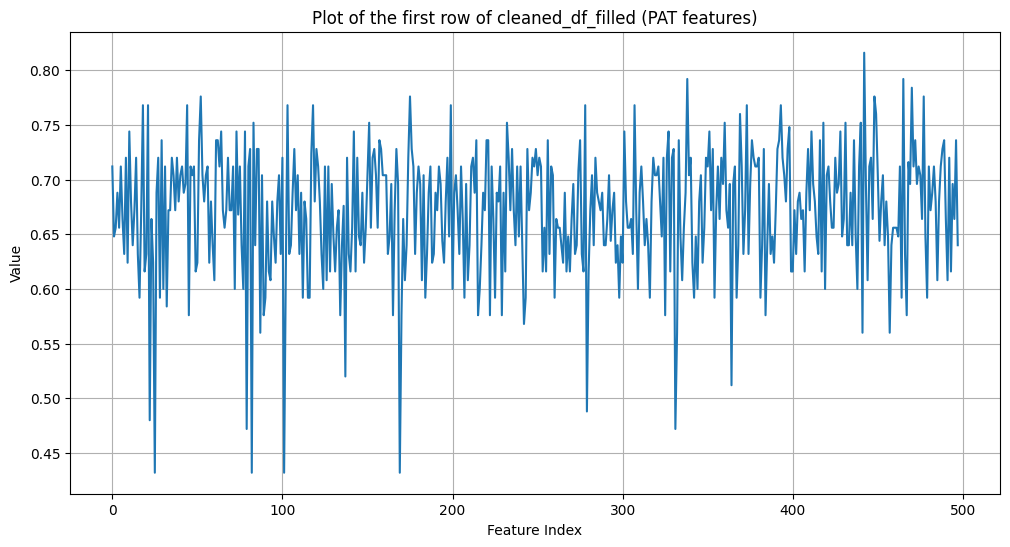

In [116]:
import matplotlib.pyplot as plt

# Select the first row
column =cleaned_df_imputed.iloc[:, 300]

# Exclude the last two elements (Systolic BP and Diastolic BP labels) for plotting
#plot_data = first_row[:-2]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(column)
plt.title('Plot of the first row of cleaned_df_filled (PAT features)')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [117]:
'''columm =cleaned_df.iloc[:, 300]
print(max(columm))'''

'columm =cleaned_df.iloc[:, 300]\nprint(max(columm))'

In [118]:
#print(column)

In [119]:
#print(column.tolist())

In [120]:
#print(min(column))

In [121]:
#print(max(column))

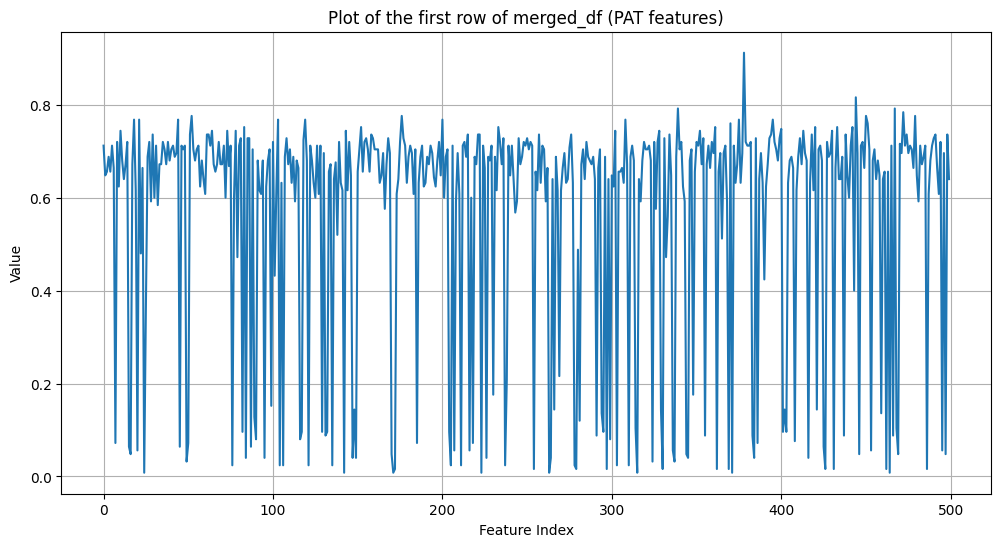

In [104]:
import matplotlib.pyplot as plt

# Select the first row
columnn =merged_df.iloc[:, 300]

# Exclude the last two elements (Systolic BP and Diastolic BP labels) for plotting
#plot_data = first_row[:-2]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(columnn)
plt.title('Plot of the first row of merged_df (PAT features)')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [122]:
#print(min(columnn))

In [123]:
#print(max(columnn))

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming merged_df is your DataFrame with all PAT features + Systolic BP + Diastolic BP

# Select feature columns (all except last two)
feature_cols = cleaned_df_imputed.columns[:-2]  # All except last two columns

X = cleaned_df_imputed[feature_cols]

# Targets
y_systolic = cleaned_df_imputed['Systolic BP']
y_diastolic = cleaned_df_imputed['Diastolic BP']

# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Initialize and train Random Forest regressors
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train, y_train_s)

model_d = RandomForestRegressor(n_estimators=100, random_state=42)
model_d.fit(X_train, y_train_d)

# Function to calculate accuracy within tolerance
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = abs(y_true - y_pred) <= tol
    accuracy = correct.sum() / len(y_true) * 100
    return accuracy

# Predict on test set
pred_s_test = model_s.predict(X_test)
pred_d_test = model_d.predict(X_test)

# Predict on train set
pred_s_train = model_s.predict(X_train)
pred_d_train = model_d.predict(X_train)

# Calculate accuracy (% predictions within ±5 mmHg)
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test, tol=5)
acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test, tol=5)

acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)

print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")


Systolic BP Accuracy ±5 mmHg: Train = 51.51%, Test = 17.00%
Diastolic BP Accuracy ±5 mmHg: Train = 86.93%, Test = 41.00%


In [127]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split features and labels
feature_cols = cleaned_df_imputed.columns[:-2]
X = cleaned_df_imputed[feature_cols]
y_systolic = cleaned_df_imputed['Systolic BP']
y_diastolic = cleaned_df_imputed['Diastolic BP']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train_s, y_test_s = train_test_split(X_scaled, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X_scaled, y_diastolic, test_size=0.2, random_state=42)

# Define NN model for systolic BP
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_s = Dense(1)(x)
model_s = Model(inputs=input_layer, outputs=output_s)

model_s.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_s.fit(X_train, y_train_s, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Define NN model for diastolic BP
x2 = Dense(128, activation='relu')(input_layer)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)
output_d = Dense(1)(x2)
model_d = Model(inputs=input_layer, outputs=output_d)

model_d.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_d.fit(X_train, y_train_d, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Accuracy within ±5 mmHg
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    y_pred = y_pred.flatten()
    correct = np.abs(y_true - y_pred) <= tol
    return np.sum(correct) / len(y_true) * 100

# Predict
pred_s_test = model_s.predict(X_test)
pred_s_train = model_s.predict(X_train)

pred_d_test = model_d.predict(X_test)
pred_d_train = model_d.predict(X_train)

# Calculate accuracies
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test)
acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train)

acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test)
acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train)

# Results
print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Systolic BP Accuracy ±5 mmHg: Train = 24.12%, Test = 8.00%
Diastolic BP Accuracy ±5 mmHg: Train = 78.14%, Test = 28.00%


In [125]:
cleaned_df_filled = merged_df

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming merged_df is your DataFrame with all PAT features + Systolic BP + Diastolic BP

# Select feature columns (all except last two)
feature_cols = cleaned_df_filled.columns[:-2]  # All except last two columns

X = cleaned_df_filled[feature_cols]

# Targets
y_systolic = cleaned_df_filled['Systolic BP']
y_diastolic = cleaned_df_filled['Diastolic BP']

# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Initialize and train Random Forest regressors
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train, y_train_s)

model_d = RandomForestRegressor(n_estimators=100, random_state=42)
model_d.fit(X_train, y_train_d)

# Function to calculate accuracy within tolerance
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = abs(y_true - y_pred) <= tol
    accuracy = correct.sum() / len(y_true) * 100
    return accuracy

# Predict on test set
pred_s_test = model_s.predict(X_test)
pred_d_test = model_d.predict(X_test)

# Predict on train set
pred_s_train = model_s.predict(X_train)
pred_d_train = model_d.predict(X_train)

# Calculate accuracy (% predictions within ±5 mmHg)
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test, tol=5)
acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test, tol=5)

acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)

print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")


Systolic BP Accuracy ±5 mmHg: Train = 50.75%, Test = 17.00%
Diastolic BP Accuracy ±5 mmHg: Train = 82.00%, Test = 37.00%
